In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import csv

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [2]:
N = 100
list_number = list(range(N))

txt_f = open('data_int.txt', 'w')

with open('data_int.txt', 'w') as f:
    f.write(str(list_number))

print('The content of the file data_int.txt is')
!cat data_int.txt

The content of the file data_int.txt is
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

In [3]:
matrix_num = np.array(range(25)).reshape(5,5)

txt_f = open('data_float.txt', 'w')

with open('data_float.txt', 'w') as f:
    f.write(str(matrix_num))

print('The content of the file data_float.txt is')
!cat data_float.txt

The content of the file data_float.txt is
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

In [4]:
with open('data_float.txt', 'r') as txt_f:
    f_line = (line.strip() for line in txt_f)
    lines = (line.split(",") for line in f_line if line)
    with open('data_float.csv', 'w') as csv_f:
        writer = csv.writer(csv_f)
        writer.writerows(lines)

print('The content of the file data_float.csv is')
!cat data_float.csv

The content of the file data_float.csv is
[[ 0  1  2  3  4]
[ 5  6  7  8  9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]]


2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [5]:
#!wget https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

In [6]:
data = json.load(open('user_data.json'))
filter_data = [x for x in data if x['CreditCardType'] == 'American Express']
with open('data_j.json', 'w') as f:
    f.write(json.dumps(filter_data, ensure_ascii=False, indent=4))

In [7]:
df = pd.read_json ('data_j.json')
df.to_csv ('data_j.csv')

print('The user_data.json data with "CreditCardType" equals to "American Express" are\n')
!cat data_j.csv

The user_data.json data with "CreditCardType" equals to "American Express" are

,ID,JobTitle,EmailAddress,FirstNameLastName,CreditCard,CreditCardType
0,2,Investment  Advisor,Clint_Thorpe5003@bulaffy.com,Clint Thorpe,7083-8766-0251-2345,American Express
1,12,Retail Trainee,Phillip_Carpenter9505@famism.biz,Phillip Carpenter,3657-0088-0820-5247,American Express
2,28,Project Manager,Russel_Graves1378@extex.org,Russel Graves,6718-4818-8011-6024,American Express
3,39,Stockbroker,Leanne_Newton1268@typill.biz,Leanne Newton,5438-0816-4166-4847,American Express
4,57,Budget Analyst,Tony_Giles1960@iatim.tech,Tony Giles,8130-3425-7573-7745,American Express
5,62,CNC Operator,Owen_Allcott5125@bauros.biz,Owen Allcott,4156-0107-7210-2630,American Express
6,68,Project Manager,Liam_Lynn3280@kideod.biz,Liam Lynn,7152-3247-6053-2233,American Express
7,74,Dentist,Regina_Woodcock5820@yahoo.com,Regina Woodcock,0208-1753-3870-8002,American Express
8,81,HR Specialist,Carter_Wallace9614@atink.com,Carter Wallace,

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [8]:
#!wget https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

In [9]:
file_name = 'mushrooms_categorized.csv'
data = pd.read_csv(file_name)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [10]:
val = data.groupby('class').mean()
val

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,1.498099,1.775665,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,0.692543,1.359551,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


In [11]:
val.to_json('mushrooms_mean.json', orient = 'index', indent = 4)

print('The average values of each feature of the file, separated by class are\n')
!cat mushrooms_mean.json 

The average values of each feature of the file, separated by class are

{
    "0":{
        "cap-shape":3.2661596958,
        "cap-surface":1.6159695817,
        "cap-color":4.5817490494,
        "bruises":0.6539923954,
        "odor":4.3346007605,
        "gill-attachment":0.9543726236,
        "gill-spacing":0.2851711027,
        "gill-size":0.0684410646,
        "gill-color":6.6226235741,
        "stalk-shape":0.6159695817,
        "stalk-root":1.4980988593,
        "stalk-surface-above-ring":1.7756653992,
        "stalk-surface-below-ring":1.7984790875,
        "stalk-color-above-ring":6.0988593156,
        "stalk-color-below-ring":6.0646387833,
        "veil-type":0.0,
        "veil-color":1.9315589354,
        "ring-number":1.1254752852,
        "ring-type":3.0076045627,
        "spore-print-color":3.2015209125,
        "population":3.283269962,
        "habitat":1.1482889734
    },
    "1":{
        "cap-shape":3.4361593463,
        "cap-surface":2.0551583248,
        "cap-color

4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [12]:
#!wget https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

In [13]:
with open('credit_card.dat','rb+') as f:
    file_content = f.read().splitlines() 

final_value = []
for elem in file_content:
    if len(elem) == 19*6+4:
        temp = []
        for i in range(19):
            temp.append(chr(int(elem[i*6:i*6+6] ,2)))
        final_value.append(''.join(temp))  

print('The credit card number are\n')  
final_value

The credit card number are



['7648 5673 3775 2271',
 '3257 8247 3354 2266',
 '2722 0001 4011 6652',
 '0661 3063 3742 3150',
 '0432 1608 1462 4742',
 '5827 2027 8785 7303',
 '5774 8528 2087 1117',
 '8140 1210 6352 2845',
 '5764 1133 7301 7100',
 '6456 1737 4126 6726',
 '1228 8631 7382 0000',
 '7051 0160 5374 3166',
 '0618 3587 1630 6376',
 '1545 5454 7444 5636',
 '6735 3116 3202 6834',
 '7287 5011 1547 8413',
 '7033 2607 3328 4200',
 '2568 5244 1874 5024',
 '1684 2253 7570 7118',
 '0672 2576 0575 6631',
 '6332 8353 8787 1340',
 '1813 3361 1175 4211',
 '2477 6450 8840 2368',
 '5512 3505 2563 1326',
 '3083 7882 0621 0025',
 '4521 5148 8045 0334',
 '7563 3654 8713 5787',
 '8324 2664 0476 5561',
 '0565 2504 7168 3510',
 '5107 5507 1767 0738',
 '2462 1821 2448 1443',
 '2788 0638 6861 6554',
 '5851 5873 5474 0547',
 '0670 1004 4013 2655',
 '5874 5506 3048 0806',
 '2805 5401 8462 1260',
 '5083 8406 6310 1862',
 '1076 1445 3013 2266',
 '8440 4804 4844 5277',
 '4758 6141 0686 1387',
 '7586 0675 0315 2568',
 '2544 1258 7432

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

In [14]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

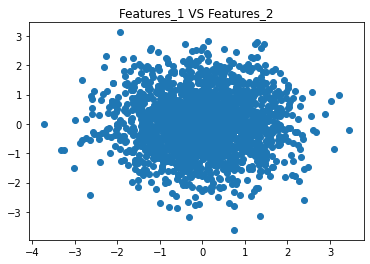

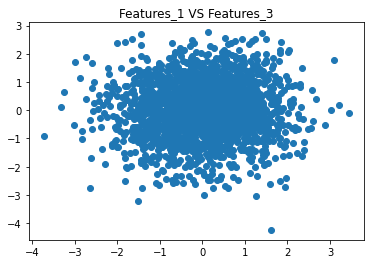

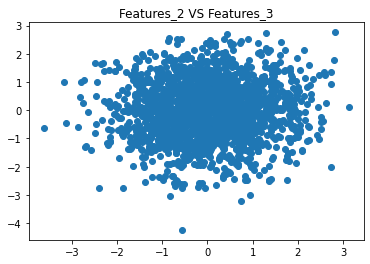

In [15]:
data = pd.read_csv("regression_generated.csv")

plt.scatter(data.features_1, data.features_2)
plt.title('Features_1 VS Features_2')
plt.show()
plt.scatter(data.features_1, data.features_3)
plt.title('Features_1 VS Features_3')
plt.show()
plt.scatter(data.features_2, data.features_3)
plt.title('Features_2 VS Features_3')
plt.show()